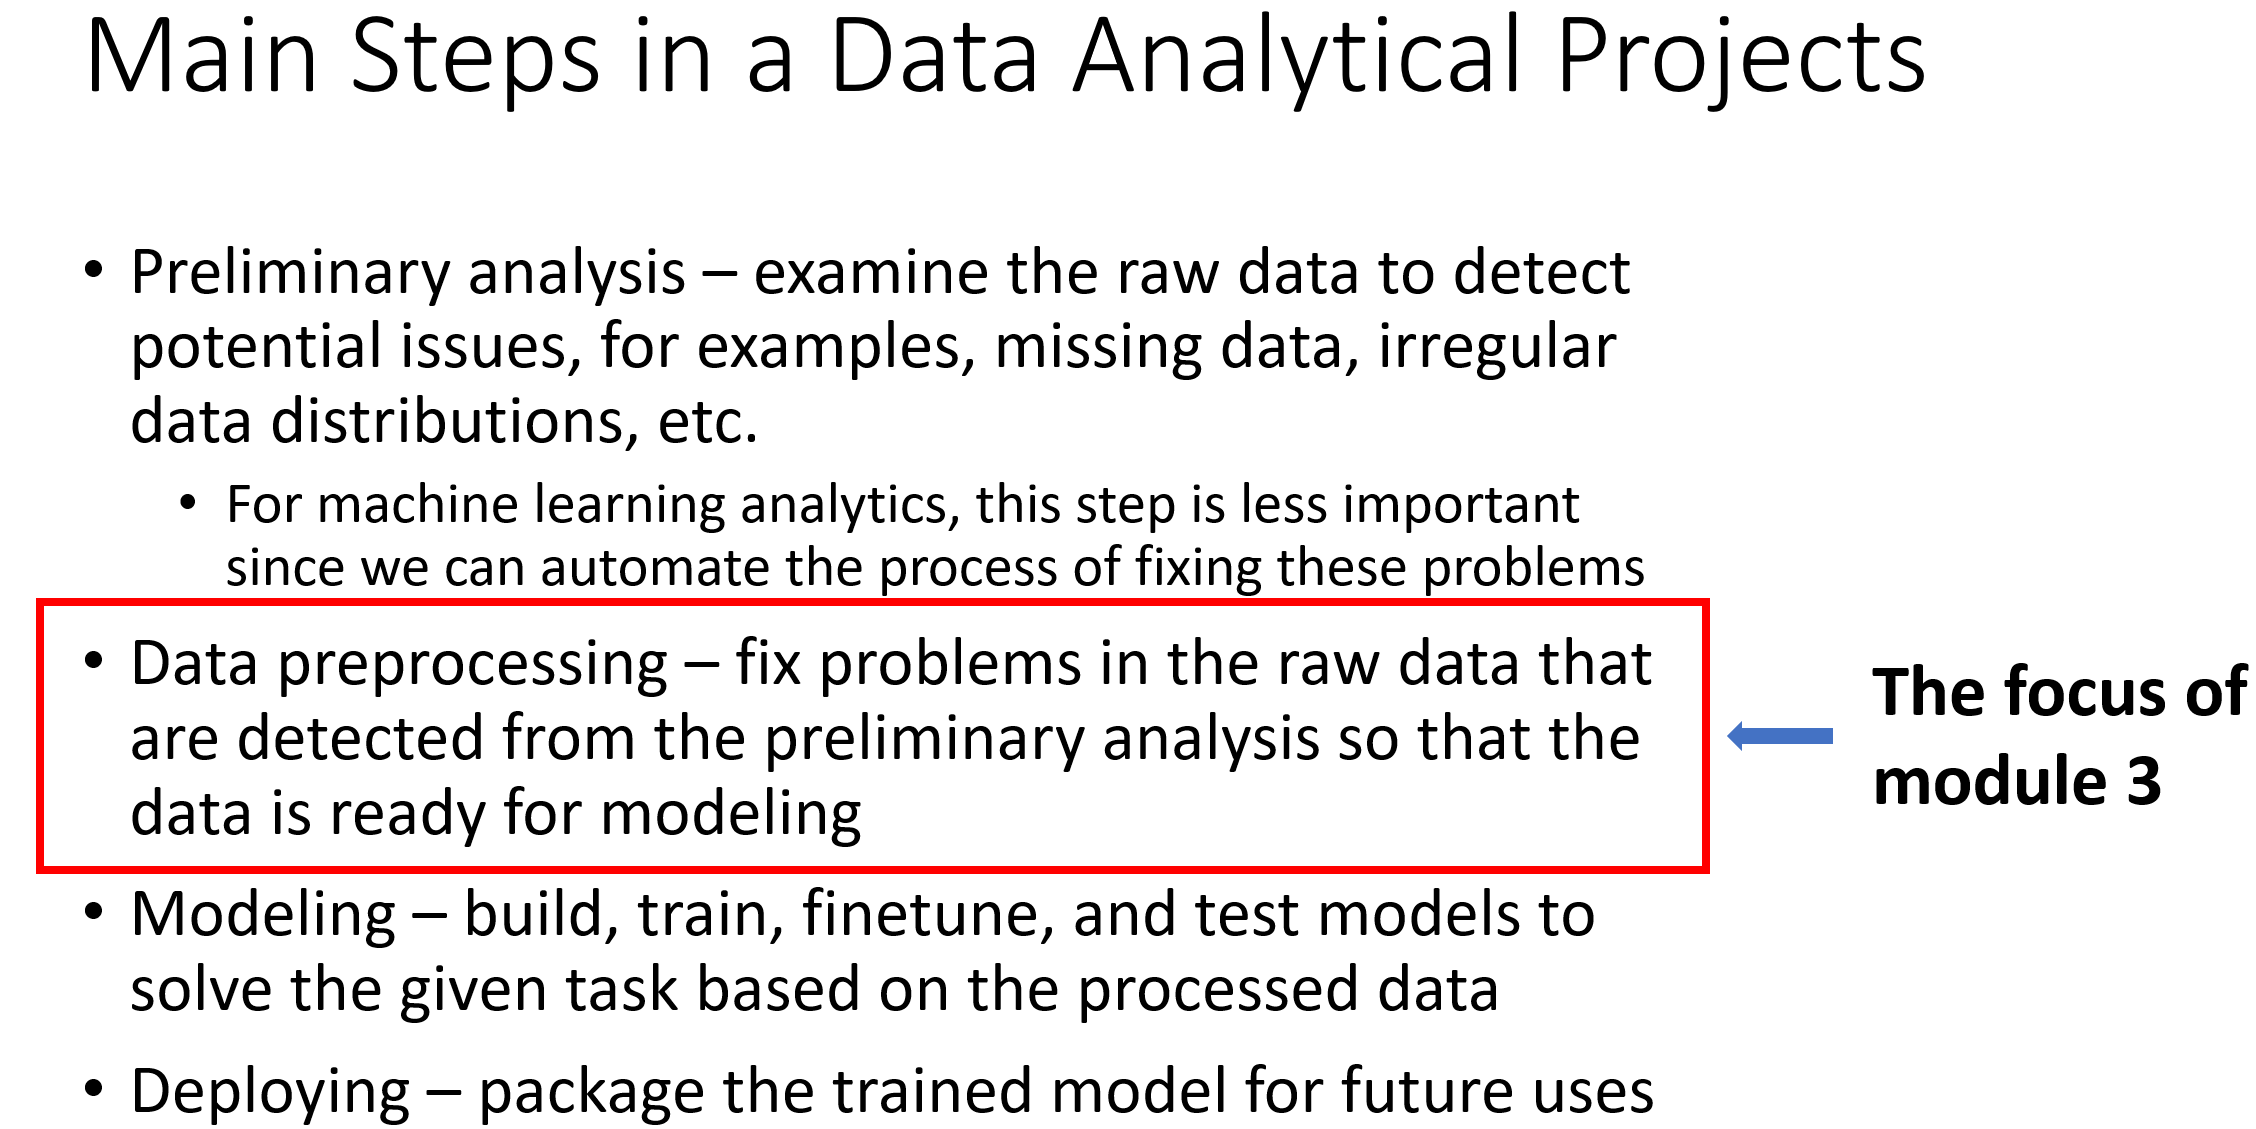

<h3>Preparation</h3>

For this module, we need to install pandas and scikit-learn in your local environment. These will be readily available on AWS and Azure, so we do not need to repeat this step then.

- If you are using Windows, open a new command prompt and run
    - pip install pandas
    - pip install scikit-learn
    
- If you are using Mac or Linux, open a new terminal and run
    - sudo pip install pandas
    - sudo pip install scikit-learn

<h3> Introduction to Pandas </h3>

Recall the example of credit rating in our introduction, the data needed to model problem may look like below

<div>
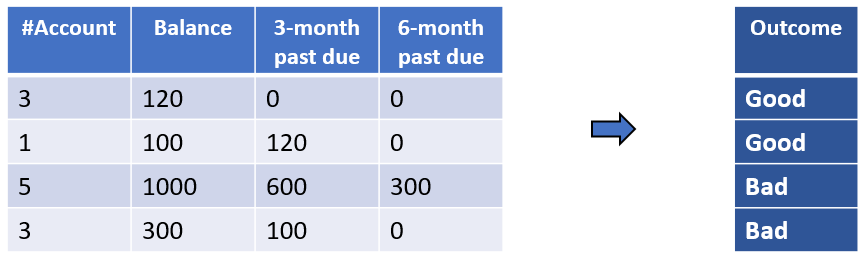
</div>

In this case, the input data has a 2D structure (similar to tables in relational databases), and the target data has a 1D structure. Please note that this 2D refers to the structure of the data and is different from the dimensionality of the input data space, which is 4 in this case (meaning the input data has four features).

In practice, data you receive for a project is almost never as clean and ready for analysis as in this example. You need to do a lot of preprocessing (e.g. add/remove features, clean coded values, dealing with missing values, merge multiple data sources...) for raw data to become modeling-ready. For that purpose, in this module, we are going to learn <b>Pandas</b> - a Python package for data manipulation. Pandas can also be used to explore data as we will be doing by the end of this module.

In short, we use pandas for these purposes:
- Loading data
- Manipulating data (i.e. preprocessing), may combine with scikit-learn
- Exploring data (some calls it preliminary analysis), may combine with visualization with matplotlib

<h3> Pandas Data Structure </h3>

1. Series: 1D array like structure (can also be called vector). The outcome data in the credit rating example can be stored in a Pandas series. Another example is that you can store daily close price of a stock in an 1D series:
    - 129 128.5 129.7 130 132.4 132.5 133 ...
2. DataFrame: 2D structure. The input data in the credit rating example can be stored in a Pandas DataFrame
    - Probably most (if not all) datasets with which you will be working in this course will be a DataFrame.
    - Unless you would like to work with time series, signals, or images
3. Panel: 3D structure. We won't likely work with this structure for this course. For image data, we will be using Numpy instead.

<h3> Loading Data </h3>

First, import pandas and alias it as <b>pd</b> (so it's more convenient to refer to the module). The data we use is the IRIS data, available in sklearn. We also import the <b>load_iris()</b> function to load the data to your Python session. The code below generates the iris data as a pandas dataframe and stores it in the iris variable.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)['frame']
iris.columns = ['sepallength','sepalwidth','petallength','petalwidth','class']
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h3> Working with DataFrame </h3>

<h4> Slicing </h4>

Printing out a whole dataset doesn't give us much information. We probably want to look closer at certain rows or columns, or row/column combinations. To do this, we can <b>slice</b> the DataFrame. In general, we use DataFrame.loc or DataFrame.iloc to slice DataFrame. You need to provide two slicing conditions, one for row slicing and one for column slicing: 

<b>DataFrame.loc[{row condition} , {column condition}]</b>

or 

<b>DataFrame.iloc[{row condition} , {column condition}]</b>

In [16]:
# iris_subset = iris.loc[:, ['sepalwidth','sepallength']]      #getting all rows, sepalwidth and sepallength columns
# iris.loc[:10, ['petalwidth','petallength']]    #getting row 0 to 10, petalwidth and petallength columns
# iris.loc[20:30, ['petallength','sepalwidth']]  #getting row 20 to 30, petallength and sepalwidth columns 
#                                                #notice the columns appear in the order we listed them

iris.loc[140:,['class']] #getting rows 140 until the end, column 'class'

,class
140,2
141,2
142,2
143,2
144,2
145,2
146,2
147,2
148,2
149,2


In [17]:
iris.loc[140:,'class']

140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: class, dtype: int32

In [23]:
#to use column indices instead of their names, we use iloc 
# iris.iloc[:, [0]] #all rows, column 0
# iris.iloc[10:21, 2:4]  #rows 10 to 20, columns 5 to 8
iris.iloc[[10,40,70], [1,3]] #rows 10, 40, 70, and columns 1, 5, 8

,sepalwidth,petalwidth
10,3.7,0.2
40,3.5,0.3
70,3.2,1.8


In [25]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Slicing with indices is not the only way. In many cases, we want to slice with certain conditions on the rows, and we can do that with loc() and iloc() also

In [31]:
# iris.loc[iris['sepalwidth'] < 3, :] #rows whose sepalwidth < 3, all columns
iris.loc[iris['sepalwidth'] < 3, ['sepalwidth','petalwidth','class']] #rows whose sepalwidth < 3, column 'sepalwidth' and 'class'

,sepalwidth,petalwidth,class
8,2.9,0.2,0
41,2.3,0.3,0
53,2.3,1.3,1
54,2.8,1.5,1
55,2.8,1.3,1
57,2.4,1.0,1
58,2.9,1.3,1
59,2.7,1.4,1
60,2.0,1.0,1
62,2.2,1.0,1


we can combine conditions, <b>'&'</b> for <b>and</b>, and <b>'|'</b> for <b>or</b>. Remember to wrap each condition in parentheses <b>()</b>

In [40]:
#rows whose sepalwidth < 3 and petalwidth > 1, and all columns
# iris.loc[(iris['sepalwidth'] < 3) & (iris['petalwidth'] > 2), :]

# #rows whose sepalwidth > 2.5 and petalwidth < 1, and all sepalwidth, petalwidth, and class columns
# iris.loc[(iris['sepalwidth'] > 2.5) & (iris['petalwidth'] < 1), ['sepalwidth','petalwidth','class']]

# #rows whose class is setosa, and all columns
iris.loc[(iris['class']==1) | (iris['class']==0), :]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Note that slicing with loc() or iloc() always returns a DataFrame. Beside viewing, we can always store the new DataFrame in a new variable. Remember that no slicing takes effect unless you store them somewhere. 

In [41]:
iris_subset = iris.loc[(iris['sepalwidth'] > 2.5) & (iris['petalwidth'] < 1), ['sepalwidth','petalwidth','class']]
iris_subset

,sepalwidth,petalwidth,class
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
5,3.9,0.4,0
6,3.4,0.3,0
7,3.4,0.2,0
8,2.9,0.2,0
9,3.1,0.1,0


<h4> Manipulating Rows and Columns </h4>

We can do quite many things with rows and columns in DataFrame besides slicing them. 

- We can apply basic math operations on numerics column. These operations are applied on rows separately

In [42]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
#even as a new column in the DataFrame
iris['sepallength4'] = iris['sepallength'] ** 2
iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1,sepallength2,sepallength3,sepallength4
0,5.1,3.5,1.4,0.2,0,6.1,10.2,2.55,26.01
1,4.9,3.0,1.4,0.2,0,5.9,9.8,2.45,24.01
2,4.7,3.2,1.3,0.2,0,5.7,9.4,2.35,22.09
3,4.6,3.1,1.5,0.2,0,5.6,9.2,2.30,21.16
4,5.0,3.6,1.4,0.2,0,6.0,10.0,2.50,25.00
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,7.7,13.4,3.35,44.89
146,6.3,2.5,5.0,1.9,2,7.3,12.6,3.15,39.69
147,6.5,3.0,5.2,2.0,2,7.5,13.0,3.25,42.25
148,6.2,3.4,5.4,2.3,2,7.2,12.4,3.10,38.44


In [47]:
#or even overwrite current columns. I highly recommend against doing this. We should always keep our original data somewhere
iris['sepallength1'] = iris['sepallength1'] / 2
iris

,sepallength,sepalwidth,petallength,petalwidth,class,sepallength1,sepallength2,sepallength3,sepallength4
0,5.1,3.5,1.4,0.2,0,3.05,10.2,2.55,26.01
1,4.9,3.0,1.4,0.2,0,2.95,9.8,2.45,24.01
2,4.7,3.2,1.3,0.2,0,2.85,9.4,2.35,22.09
3,4.6,3.1,1.5,0.2,0,2.80,9.2,2.30,21.16
4,5.0,3.6,1.4,0.2,0,3.00,10.0,2.50,25.00
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3.85,13.4,3.35,44.89
146,6.3,2.5,5.0,1.9,2,3.65,12.6,3.15,39.69
147,6.5,3.0,5.2,2.0,2,3.75,13.0,3.25,42.25
148,6.2,3.4,5.4,2.3,2,3.60,12.4,3.10,38.44


Besides basic math operations, we can also apply functions like log(), exp(), sqrt(), sin(), cos()... These functions however come from <b>Numpy</b>, and we first need to import the package. After that, we can use the functions on columns (which are Series) directly. Mathematical functions will return an array of the same size as input, and can be directly assigned to the DataFrame as a new column

In [48]:
import numpy as np #import numpy and alias it as np

In [50]:
iris = load_iris(as_frame=True)['frame']
iris.columns = ['sepallength','sepalwidth','petallength','petalwidth','class']

In [51]:
iris['log_sepallength'] = np.log(iris['sepallength'])
iris['sqrt_sepalwidth'] = np.sqrt(iris['sepalwidth'])
iris['sin_petallength'] = np.sin(iris['petallength'])
iris

,sepallength,sepalwidth,petallength,petalwidth,class,log_sepallength,sqrt_sepalwidth,sin_petallength
0,5.1,3.5,1.4,0.2,0,1.629241,1.870829,0.985450
1,4.9,3.0,1.4,0.2,0,1.589235,1.732051,0.985450
2,4.7,3.2,1.3,0.2,0,1.547563,1.788854,0.963558
3,4.6,3.1,1.5,0.2,0,1.526056,1.760682,0.997495
4,5.0,3.6,1.4,0.2,0,1.609438,1.897367,0.985450
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.902108,1.732051,-0.883455
146,6.3,2.5,5.0,1.9,2,1.840550,1.581139,-0.958924
147,6.5,3.0,5.2,2.0,2,1.871802,1.732051,-0.883455
148,6.2,3.4,5.4,2.3,2,1.824549,1.843909,-0.772764


<h5>Categorize Numeric Columns</h5>

Suppose we want to create a new column <i>sepalgroup</i> that represents different groups of sepallength. Rows with sepallength < 5.5 belong to group "short", and they belong to "long" otherwise

In [52]:
iris.loc[iris['sepallength'] < 5.5, 'sepalgroup'] = 'short' #slice the rows with sepallength < 5.5 and assign their group
iris.loc[iris['sepallength'] >= 5.5, 'sepalgroup'] = 'long' #slice the remaining rows and assign their group
iris.loc[:,['sepallength','sepalgroup']]

,sepallength,sepalgroup
0,5.1,short
1,4.9,short
2,4.7,short
3,4.6,short
4,5.0,short
...,...,...
145,6.7,long
146,6.3,long
147,6.5,long
148,6.2,long


In [53]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class,log_sepallength,sqrt_sepalwidth,sin_petallength,sepalgroup
0,5.1,3.5,1.4,0.2,0,1.629241,1.870829,0.985450,short
1,4.9,3.0,1.4,0.2,0,1.589235,1.732051,0.985450,short
2,4.7,3.2,1.3,0.2,0,1.547563,1.788854,0.963558,short
3,4.6,3.1,1.5,0.2,0,1.526056,1.760682,0.997495,short
4,5.0,3.6,1.4,0.2,0,1.609438,1.897367,0.985450,short
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.902108,1.732051,-0.883455,long
146,6.3,2.5,5.0,1.9,2,1.840550,1.581139,-0.958924,long
147,6.5,3.0,5.2,2.0,2,1.871802,1.732051,-0.883455,long
148,6.2,3.4,5.4,2.3,2,1.824549,1.843909,-0.772764,long


<h5>Convert Categories to Numbers</h5>

It is also quite often we want to convert categories into numbers. However, you have to make sure the order in the numerical values makes sense. 

For example, categories like "low", "medium", "high" make sense when being convert to 1, 2, 3 because in some sense, 1 < 2 is equivalent "low" < "medium". However, groups like "Europe", "Asia", "Africa"... don't have any inherent order. If you convert them to 1, 2, 3, does 1 < 2, or "Europe" < "Asia" make sense? In such cases, we use something called "dummy variables", however, they are for discussion on another day.

In this example, we will convert three groups of flowers to 1, 2, 3, purely for demonstration. Remember that it doesn't really make sense to do this, because the groups have no inherent order.

In [54]:
iris.loc[iris['sepalgroup'] == 'short', 'sepalcode'] = 1 #similar to before, slice, 
                                                        #then assign value to the new column of the sliced group
iris.loc[iris['sepalgroup'] == 'long', 'sepalcode'] = 2
iris

,sepallength,sepalwidth,petallength,petalwidth,class,log_sepallength,sqrt_sepalwidth,sin_petallength,sepalgroup,sepalcode
0,5.1,3.5,1.4,0.2,0,1.629241,1.870829,0.985450,short,1.0
1,4.9,3.0,1.4,0.2,0,1.589235,1.732051,0.985450,short,1.0
2,4.7,3.2,1.3,0.2,0,1.547563,1.788854,0.963558,short,1.0
3,4.6,3.1,1.5,0.2,0,1.526056,1.760682,0.997495,short,1.0
4,5.0,3.6,1.4,0.2,0,1.609438,1.897367,0.985450,short,1.0
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.902108,1.732051,-0.883455,long,2.0
146,6.3,2.5,5.0,1.9,2,1.840550,1.581139,-0.958924,long,2.0
147,6.5,3.0,5.2,2.0,2,1.871802,1.732051,-0.883455,long,2.0
148,6.2,3.4,5.4,2.3,2,1.824549,1.843909,-0.772764,long,2.0


<h4>Descriptive Statistics</h4>

Descriptive statistics refer to column-wise measurements like mean, standard deviation, min, max... (for numerical columns), and frequencies (for class columns). They are not the target of an analysis, but are quite important for preliminary analysis to gain some first insight of the data. 

If you don't remember the statistics, in term of a numeric column
- mean: average value of the column
- variance: measure how the values spread out from the mean
- standard deviation: squared root of the variance
- min/max: minimum and maximum value in the column
- x% percentile: sort values in the column from min to max, then the x% percentile is the value at the $x^{th}$% position
    - The 0% percentile is the min, 100% percentile is the max. We also call the 50% percentile the median

Pandas DataFrame comes with functions like <b>mean()</b>, <b>std()</b>, <b>min()</b>, <b>max()</b>... for these statistics

In [55]:
iris = load_iris(as_frame=True)['frame']
iris.columns = ['sepallength','sepalwidth','petallength','petalwidth','class'] #I'm just rereading the data to remove all the columns created in previous steps

In [58]:
print(iris.mean(numeric_only=True)) #mean of all columns, numeric_only option is to omit class columns from the result
print(iris.std(numeric_only=True)) #standard deviation of all columns
print(iris.var(numeric_only=True)) #variance of all columns
print(iris.min(numeric_only=True)) #min of all columns
print(iris.median(numeric_only=True)) #median of all columns
print(iris.max(numeric_only=True)) #max of all columns

sepallength    5.843333
sepalwidth     3.057333
petallength    3.758000
petalwidth     1.199333
class          1.000000
dtype: float64
sepallength    0.828066
sepalwidth     0.435866
petallength    1.765298
petalwidth     0.762238
class          0.819232
dtype: float64
sepallength    0.685694
sepalwidth     0.189979
petallength    3.116278
petalwidth     0.581006
class          0.671141
dtype: float64
sepallength    4.3
sepalwidth     2.0
petallength    1.0
petalwidth     0.1
class          0.0
dtype: float64
sepallength    5.80
sepalwidth     3.00
petallength    4.35
petalwidth     1.30
class          1.00
dtype: float64
sepallength    7.9
sepalwidth     4.4
petallength    6.9
petalwidth     2.5
class          2.0
dtype: float64


In [59]:
iris.describe() #we can also use DataFrame.describe() to obtain all statistics
                #describe() also gives us some percentile values
                #remember, the 50% percentile is the median

,sepallength,sepalwidth,petallength,petalwidth,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [60]:
iris.describe(percentiles=[0.1,0.25,0.5,0.75,0.9]) #we can specify the percentile we want to display
                                                   #remember to divide the value by 100
                                                   #e.g. 10th percentile is equivalent to 0.1

,sepallength,sepalwidth,petallength,petalwidth,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
10%,4.800000,2.500000,1.400000,0.200000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
90%,6.900000,3.610000,5.800000,2.200000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [61]:
iris['class'].value_counts() #to count frequency of classes, we must first slice the column first. 
                             #Then we can use value_counts()

0    50
1    50
2    50
Name: class, dtype: int64